## **AIVLE School 미니프로젝트 5기 AI트랙 2차** ##
## **공공데이터를 활용한 <span style="color:skyblue">미세먼지 농도</span> 예측**
---
## [step 1,2] 데이터 분석 및 전처리

## **0.프로젝트 소개**

### (1) 수행 목표
- 미세먼지 농도를 예측하는 머신러닝 모델을 만드세요.

#### 우리가 풀어야 하는 문제는 무엇인가요?
* 서울 지역의 미세먼지 데이터와 날씨 데이터를 활용하여, 미세먼지 예측에 관련 있는 데이터 항목으로 데이터를 구성, 전처리 하여 미세먼지 농도를 예측하는 머신러닝 모델 구현

### (2) 데이터 소개

#### 1) 기본 데이터

* 학습 데이터
    * air_2022.csv : 2022년 미세먼지 데이터
    * weather_2022.csv : 2022년 날씨 데이터
* 테스트 데이터
    * air_2023.csv : 2023년 미세먼지 데이터
    * weather_2023.csv : 2023년 날씨 데이터

#### 2) 데이터셋의 변수 소개(weather_2022,2023)

* 증기압: 증기가 고체 또는 액체와 동적 평형 상태에 있을 때 증기의 압력 (증기가 되려는 힘)
* 이슬점 온도: 불포화 상태의 공기가 냉각될 때, 포화 상태에 도달하여 수증기의 응결이 시작되는 온도
* 일조: 일정한 물체나 땅의 겉면에 태양 광선이 비치는 시간 (1시간 중 비율)
* 일사(량): 태양으로부터 오는 태양 복사 에너지가 지표에 닿는 양 (면적당 에너지 량)
* 전운량: 하늘을 육안으로 관측하여 전부 구름일 때 10, 구름이 덮고 있는 하늘의 비율에 따라 0~10
* 중하층운량: 중층과 하층에 있는 구름의 분포량(중하층 구름이 날씨에 영향 주므로 따로 표기)
* 운형(운형약어): 구름의 종류. 약어 코드로 기재됨
* 최저운고: 가장 낮은 구름의 높이
* 현상번호(국내식): 비, 소낙비, 싸락눈, 눈보라 등의 기상현상을 나타낸 코드번호
* 지면온도: 지면 0cm 온도
* 지중온도: 땅 속 온도변수1

## **1.환경설정**

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.)
        * 2) 구글 코랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
            
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정
* 로컬환경 또는 구글 코랩 중 하나를 사용하시면 됩니다.

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

#### 2) 구글 코랩 수행

* 구글 드라이브 연결

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# path = '/content/drive/MyDrive/project/'


### (2) 라이브러리 설치 및 불러오기

#### 1) 라이브러리 설치 및 로딩

In [1]:
# 필요한 라이브러리 설치 및 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
from scipy import interpolate
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.



/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [158]:
# 시각화 한글폰트 설정을 위해 아래 코드를 실행하세요.
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

### (3) 데이터 불러오기
* Pandas 라이브러리를 활용해서 'air_2022.csv'파일을 'air_22' 변수에,'air_2023.csv'파일을 'air_23' 변수에 저장하고 그 데이터를 확인하세요.
<br> ( 구분자(sep) : ',' / encoder = 'utf-8' / index_col = 0 )

* Pandas 라이브러리를 활용해서 'weather_2022.csv'파일을 'weather_22' 변수에,'weather_2023.csv'파일을 'weather_23' 변수에 저장하고 그 데이터를 확인하세요.
<br> ( 구분자(sep) : ',' / encoder = 'cp949' )

#### 1) 데이터로딩

In [527]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_22 = pd.read_csv('air_2022.csv',sep=',',encoding='utf-8',index_col=0)
air_23 = pd.read_csv('air_2023.csv',sep=',',encoding='utf-8',index_col=0)
weather_22 = pd.read_csv('weather_2022.csv',sep=',',encoding='CP949')
weather_23 = pd.read_csv('weather_2023.csv',sep=',',encoding='CP949')

In [528]:
air_22.shape

(8760, 12)

In [529]:
pd.set_option("display.max_columns", 150)

#### 2) 기본 정보 조회
- 데이터를 head, tail. describe, info 등을 활용하여 확인하세요.

In [530]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_22.head()


,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.014,0.028,20.0,9.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.016,0.027,19.0,10.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2022010105,0.003,0.5,0.005,0.040,24.0,11.0,서울 종로구 종로35가길 19


In [531]:
air_23.head()


,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2023010101,0.005,1.4,0.002,0.064,68.0,58.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2023010102,0.004,1.4,0.002,0.061,64.0,50.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2023010103,0.004,1.0,0.002,0.051,67.0,56.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2023010104,0.004,0.7,0.012,0.030,76.0,64.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2023010105,0.004,0.7,0.021,0.017,81.0,64.0,서울 종로구 종로35가길 19


In [532]:
weather_22.head()


,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2022-01-01 00:00,-8.5,NaN,NaN,NaN,1.9,NaN,320,NaN,41,NaN,1.3,-19.4,1021.9,NaN,1033.2,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.0,NaN,-1.0,-1.0,-0.2,1.0
1,108,서울,2022-01-01 01:00,-9.2,NaN,NaN,NaN,1.8,NaN,270,NaN,42,NaN,1.3,-19.7,1022.2,NaN,1033.6,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.2,NaN,-1.1,-1.1,-0.2,1.0
2,108,서울,2022-01-01 02:00,-9.5,NaN,NaN,NaN,1.2,NaN,270,NaN,43,NaN,1.3,-19.7,1022.3,NaN,1033.7,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.2,-0.2,1.0
3,108,서울,2022-01-01 03:00,-9.3,NaN,NaN,NaN,1.4,NaN,290,NaN,46,NaN,1.4,-18.8,1022.6,NaN,1034.0,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.2,-0.2,1.0
4,108,서울,2022-01-01 04:00,-9.6,NaN,NaN,NaN,1.7,NaN,340,NaN,48,NaN,1.4,-18.5,1021.9,NaN,1033.3,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0,0,NaN,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.3,-0.3,1.0


In [533]:
#weather_23.head()

In [593]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_22.describe()

,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25,time
count,8760.0,8.760000e+03,8673.000000,8673.000000,8673.000000,8673.000000,8604.000000,8655.000000,8760
mean,111123.0,2.022067e+09,0.003133,0.473458,0.030759,0.021319,31.756044,19.284575,2022-07-02 11:30:00
min,111123.0,2.022010e+09,0.001000,0.200000,0.001000,0.003000,3.000000,1.000000,2022-01-01 00:00:00
25%,111123.0,2.022040e+09,0.003000,0.400000,0.017000,0.011000,19.000000,10.000000,2022-04-02 05:45:00
50%,111123.0,2.022070e+09,0.003000,0.400000,0.029000,0.017000,28.000000,16.000000,2022-07-02 11:30:00
75%,111123.0,2.022100e+09,0.003000,0.500000,0.042000,0.028000,40.000000,25.000000,2022-10-01 17:15:00
max,111123.0,2.022123e+09,0.008000,1.800000,0.144000,0.074000,385.000000,121.000000,2022-12-31 23:00:00
std,0.0,3.450216e+04,0.000700,0.183086,0.019796,0.013473,22.466954,14.172678,NaN


In [535]:
air_23.describe().T

,count,mean,std,min,25%,50%,75%,max
측정소코드,5832.0,1.111230e+05,0.000000,1.111230e+05,1.111230e+05,1.111230e+05,1.111230e+05,1.111230e+05
측정일시,5832.0,2.023047e+09,22991.435924,2.023010e+09,2.023030e+09,2.023050e+09,2.023070e+09,2.023083e+09
SO2,5588.0,3.084914e-03,0.000636,1.700000e-03,2.700000e-03,3.000000e-03,3.400000e-03,9.300000e-03
CO,5798.0,4.804795e-01,0.174263,2.100000e-01,3.600000e-01,4.400000e-01,5.500000e-01,1.470000e+00
O3,5771.0,3.542953e-02,0.022049,1.300000e-03,2.000000e-02,3.270000e-02,4.720000e-02,1.859000e-01
NO2,5798.0,2.021052e-02,0.012910,3.200000e-03,1.130000e-02,1.625000e-02,2.430000e-02,8.010000e-02
PM10,5792.0,4.076744e+01,33.555825,3.000000e+00,2.100000e+01,3.200000e+01,5.000000e+01,3.460000e+02
PM25,5793.0,2.072726e+01,16.573257,1.000000e+00,1.000000e+01,1.700000e+01,2.600000e+01,1.420000e+02


In [536]:
weather_22.describe().T

,count,mean,std,min,25%,50%,75%,max
지점,8760.0,108.000000,0.000000,108.0,108.00,108.00,108.00,108.00
기온(°C),8760.0,13.293687,11.336825,-13.7,4.20,14.80,23.20,35.60
기온 QC플래그,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
강수량(mm),939.0,1.890415,4.389308,0.0,0.00,0.10,1.60,40.70
강수량 QC플래그,1568.0,9.000000,0.000000,9.0,9.00,9.00,9.00,9.00
풍속(m/s),8760.0,2.370651,1.147396,0.0,1.60,2.20,3.00,8.80
풍속 QC플래그,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
풍향(16방위),8760.0,190.046804,105.888658,0.0,70.00,230.00,270.00,360.00
풍향 QC플래그,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
습도(%),8760.0,64.513014,18.538028,17.0,50.00,65.00,79.00,100.00


In [537]:
weather_23.describe().T

,count,mean,std,min,25%,50%,75%,max
지점,5832.0,108.000000,0.000000,108.0,108.000,108.00,108.00,108.0
기온(°C),5832.0,15.269462,11.100204,-17.2,6.100,17.60,24.80,35.8
기온 QC플래그,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
강수량(mm),809.0,1.564277,3.684147,0.0,0.000,0.10,1.40,34.7
강수량 QC플래그,935.0,9.000000,0.000000,9.0,9.000,9.00,9.00,9.0
풍속(m/s),5832.0,2.298182,1.079776,0.0,1.500,2.20,2.90,7.6
풍속 QC플래그,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
풍향(16방위),5832.0,187.042181,103.020643,0.0,70.000,230.00,270.00,360.0
풍향 QC플래그,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
습도(%),5832.0,65.725309,20.220581,15.0,51.000,67.00,82.00,100.0


In [538]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8760 non-null   object 
 1   망       8760 non-null   object 
 2   측정소코드   8760 non-null   int64  
 3   측정소명    8760 non-null   object 
 4   측정일시    8760 non-null   int64  
 5   SO2     8673 non-null   float64
 6   CO      8673 non-null   float64
 7   O3      8673 non-null   float64
 8   NO2     8673 non-null   float64
 9   PM10    8604 non-null   float64
 10  PM25    8655 non-null   float64
 11  주소      8760 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 889.7+ KB


In [539]:
air_23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5832 entries, 0 to 5831
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      5832 non-null   object 
 1   망       5832 non-null   object 
 2   측정소코드   5832 non-null   int64  
 3   측정소명    5832 non-null   object 
 4   측정일시    5832 non-null   int64  
 5   SO2     5588 non-null   float64
 6   CO      5798 non-null   float64
 7   O3      5771 non-null   float64
 8   NO2     5798 non-null   float64
 9   PM10    5792 non-null   float64
 10  PM25    5793 non-null   float64
 11  주소      5832 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 592.3+ KB


In [540]:
#weather_22.info()

In [541]:
#weather_23.info()

## **2.EDA 1단계 - 데이터 기본 탐색 및 분석**

* 단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

    * <span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

        1. 변수가 내포하고 있는 의미
        2. 변수가 수치형인지, 범주형인지
        3. 결측치 존재 여부 및 조치 방안
        4. 기초 통계량 확인
        5. 데이터 분포 확인
        6. 위 정보로부터 파악한 내용 정리
        7. 추가 분석사항 도출

### (1) 변수별 단변량 분석
- 4 ~ 5개 변수를 선택해서 위 1~6번을 확인해보세요 (7번은 선택)

#### **[예시] 1) Feature1 : 측정일시**

**1. 변수가 내포하고 있는 의미**

In [542]:
# 고민하고 확인해봅시다. 측정이 이루어진 시각

**2. 변수가 수치형인지 범주형인지**
  - 날짜는 범주형? 수치형?

In [543]:
# 고민하고 확인해봅시다. 수치형

**3. 변수의 결측치 존재 여부 및 조치 방안**

In [544]:
# 고민하고 확인해봅시다. 
air_22.측정일시.isna().sum()
air_23.측정일시.isna().sum()

# 결측치 없음

0

**4.변수의 기초 통계량 확인**

In [545]:
# 고민하고 확인해봅시다.


**5. 변수의 분포 확인**

In [546]:
# 고민하고 확인해봅시다.


**6. 위 정보로 부터 파악한 내용 정리**

In [547]:
# 고민하고 확인해봅시다.

-----------**아래에 추가로 3-4개의 변수를 같은 방법으로 고민해보기!** -----------------------

In [548]:
air_22.columns

Index(['지역', '망', '측정소코드', '측정소명', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       'PM25', '주소'],
      dtype='object')

SO2 이산화황

In [549]:
air_22.SO2.isna().sum() #결측치 존재. 수치형,대기에 존재하는 이산화황 수치

87

In [550]:
air_22.SO2.describe()

count    8673.000000
mean        0.003133
std         0.000700
min         0.001000
25%         0.003000
50%         0.003000
75%         0.003000
max         0.008000
Name: SO2, dtype: float64

In [551]:
air_22.CO.isna().sum() #결측치 존재. 수치형,대기에 존재하는 일산화탄소 수치

87

In [552]:
air_22.CO.describe()

count    8673.000000
mean        0.473458
std         0.183086
min         0.200000
25%         0.400000
50%         0.400000
75%         0.500000
max         1.800000
Name: CO, dtype: float64

In [553]:
air_22.O3.isna().sum() #결측치 존재. 수치형,대기에 존재하는 오존 수치

87

In [554]:
air_22.O3.describe()

count    8673.000000
mean        0.030759
std         0.019796
min         0.001000
25%         0.017000
50%         0.029000
75%         0.042000
max         0.144000
Name: O3, dtype: float64

In [555]:
air_22.NO2.isna().sum() #결측치 존재. 수치형,대기에 존재하는 이산화질소 수치

87

In [556]:
air_22.NO2.describe()

count    8673.000000
mean        0.021319
std         0.013473
min         0.003000
25%         0.011000
50%         0.017000
75%         0.028000
max         0.074000
Name: NO2, dtype: float64

In [557]:
air_22.PM10.isna().sum() #결측치 존재. 수치형,대기에 존재하는 PM10 수치

156

In [558]:
air_22.PM10.describe()

count    8604.000000
mean       31.756044
std        22.466954
min         3.000000
25%        19.000000
50%        28.000000
75%        40.000000
max       385.000000
Name: PM10, dtype: float64

In [559]:
air_22.PM25.isna().sum() #결측치 존재. 수치형,대기에 존재하는 PM10 수치

105

In [560]:
air_22.PM25.describe()

count    8655.000000
mean       19.284575
std        14.172678
min         1.000000
25%        10.000000
50%        16.000000
75%        25.000000
max       121.000000
Name: PM25, dtype: float64

## **3.EDA 2단계 - 데이터 전처리**
- 진행한 개별 변수 분석에 맞추어 데이터를 전처리 하겠습니다.

### (1) air_22, air_23, weather_22, weather_23 데이터 전처리
* air_22, air_23  각각 '측정일시'를 활용하여 'time'변수 생성
    * 참고: 미세먼지 데이터는 1시-24시, 날씨 데이터는 0시-23시로 구성되어 있습니다. 미세먼지와 날씨 데이터를 time 기준으로 합치려면 기준이 동일해야 합니다. 미세먼지 데이터에서 time 변수 생성 시 이를 미리 고려(예: air_22['측정일시'] -1)하세요.
* time 변수를 pd.to_datetime으로 데이터 타입 변경
    * 참고: format = '%Y%m%d%H'

#### 1) air_22, air_23 의 '측정일시'를 활용하여 'time' 변수 생성

In [561]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
air_22['time'] = air_22['측정일시']
air_22['time'] = pd.to_datetime(air_22['time']-1,format='%Y%m%d%H')
air_23['time'] = air_23['측정일시']
air_23['time'] = pd.to_datetime(air_23['time']-1,format='%Y%m%d%H')
# air_23['time'] = air_23['측정일시']

In [562]:
# 결과확인

air_23


,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time
0,서울 종로구,도시대기,111123,종로구,2023010101,0.0050,1.40,0.0020,0.0640,68.0,58.0,서울 종로구 종로35가길 19,2023-01-01 00:00:00
1,서울 종로구,도시대기,111123,종로구,2023010102,0.0040,1.40,0.0020,0.0610,64.0,50.0,서울 종로구 종로35가길 19,2023-01-01 01:00:00
2,서울 종로구,도시대기,111123,종로구,2023010103,0.0040,1.00,0.0020,0.0510,67.0,56.0,서울 종로구 종로35가길 19,2023-01-01 02:00:00
3,서울 종로구,도시대기,111123,종로구,2023010104,0.0040,0.70,0.0120,0.0300,76.0,64.0,서울 종로구 종로35가길 19,2023-01-01 03:00:00
4,서울 종로구,도시대기,111123,종로구,2023010105,0.0040,0.70,0.0210,0.0170,81.0,64.0,서울 종로구 종로35가길 19,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5827,서울 종로구,도시대기,111123,종로구,2023083120,0.0028,0.41,0.0306,0.0138,20.0,14.0,서울 종로구 종로35가길 19,2023-08-31 19:00:00
5828,서울 종로구,도시대기,111123,종로구,2023083121,0.0029,0.44,0.0209,0.0202,19.0,12.0,서울 종로구 종로35가길 19,2023-08-31 20:00:00
5829,서울 종로구,도시대기,111123,종로구,2023083122,0.0030,0.45,0.0141,0.0250,19.0,11.0,서울 종로구 종로35가길 19,2023-08-31 21:00:00
5830,서울 종로구,도시대기,111123,종로구,2023083123,0.0029,0.44,0.0156,0.0206,21.0,13.0,서울 종로구 종로35가길 19,2023-08-31 22:00:00


#### 2) weather_22, weather_23 의 '일시'를 활용하여 'time' 변수 생성
* weather_22, weather_23 의 '일시'를 활용하여 'time'변수 생성
* time 변수를 pd.to_datetime으로 데이터 타입 변경

In [563]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
weather_22['일시'] = pd.to_datetime(weather_22['일시'])
weather_22['time'] = weather_22['일시']
weather_23['일시'] = pd.to_datetime(weather_23['일시'])
weather_23['time'] = weather_23['일시']

In [564]:
# 결과확인
weather_22
weather_23.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),time
0,108,서울,2023-01-01 00:00:00,0.9,NaN,NaN,9.0,1.4,NaN,200,NaN,72,NaN,4.7,-3.5,1018.5,NaN,1029.4,NaN,NaN,9.0,NaN,9.0,NaN,NaN,9,9,NaN,NaN,1503,NaN,NaN,-1.6,NaN,-0.3,-0.6,-0.5,0.6,2023-01-01 00:00:00
1,108,서울,2023-01-01 01:00:00,1.5,NaN,NaN,NaN,1.9,NaN,250,NaN,71,NaN,4.9,-3.1,1018.0,NaN,1028.9,NaN,NaN,9.0,NaN,9.0,NaN,NaN,6,6,NaN,12.0,1104,NaN,NaN,-1.4,NaN,-0.3,-0.5,-0.5,0.6,2023-01-01 01:00:00
2,108,서울,2023-01-01 02:00:00,1.5,NaN,NaN,NaN,1.9,NaN,250,NaN,72,NaN,4.9,-3.0,1017.8,NaN,1028.7,NaN,NaN,9.0,NaN,9.0,NaN,NaN,9,8,NaN,11.0,925,NaN,40.0,-1.6,NaN,-0.3,-0.5,-0.5,0.6,2023-01-01 02:00:00
3,108,서울,2023-01-01 03:00:00,1.6,NaN,NaN,NaN,1.6,NaN,250,NaN,74,NaN,5.1,-2.5,1018.1,NaN,1029.0,NaN,NaN,9.0,NaN,9.0,NaN,NaN,8,8,Sc,16.0,794,NaN,40.0,-1.8,NaN,-0.3,-0.5,-0.5,0.6,2023-01-01 03:00:00
4,108,서울,2023-01-01 04:00:00,1.5,NaN,NaN,NaN,1.4,NaN,290,NaN,74,NaN,5.0,-2.6,1018.1,NaN,1029.0,NaN,NaN,9.0,NaN,9.0,NaN,NaN,9,9,Sc,10.0,709,NaN,40.0,-1.3,NaN,-0.2,-0.5,-0.5,0.6,2023-01-01 04:00:00



#### 3) 'time' 기준으로 데이터 합치기
* 미세먼지 데이터와 날씨 데이터를 'time' 기준으로 합쳐보세요.
    * df_22에는 'time' 기준으로 22년도 미세먼지, 날씨 데이터를 합쳐보세요.
    * df_23에는 'time' 기준으로 23년도 미세먼지, 날씨 데이터를 합쳐보세요.

In [565]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
df_22 = pd.merge(air_22, weather_22, on='time')
df_23 = pd.merge(air_23, weather_23, on='time')

In [566]:
# 결과확인
df_22.columns
df_23.columns

Index(['지역', '망', '측정소코드', '측정소명', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       'PM25', '주소', 'time', '지점', '지점명', '일시', '기온(°C)', '기온 QC플래그',
       '강수량(mm)', '강수량 QC플래그', '풍속(m/s)', '풍속 QC플래그', '풍향(16방위)', '풍향 QC플래그',
       '습도(%)', '습도 QC플래그', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '현지기압 QC플래그',
       '해면기압(hPa)', '해면기압 QC플래그', '일조(hr)', '일조 QC플래그', '일사(MJ/m2)',
       '일사 QC플래그', '적설(cm)', '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)',
       '운형(운형약어)', '최저운고(100m )', '시정(10m)', '지면상태(지면상태코드)', '현상번호(국내식)',
       '지면온도(°C)', '지면온도 QC플래그', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)'],
      dtype='object')

#### 4) 사용하지 않을 변수 제거

* 머신러닝에 사용하지 않을 변수들을 제거해줍니다.
    * df_22, df_23에 여러분들이 사용할 변수들만 넣어보세요.
* time 변수를 index로 세팅하고 (set_index) 데이터가 정렬되어 있지 않으므로 index 기준으로 정렬하세요. (sort_index)

In [567]:
# df_22, df_23에 사용할 변수들만 할당
col = ['지역','망','측정소코드','측정소명','측정일시','주소','지점','지점명','일시','기온 QC플래그',\
       '강수량 QC플래그','풍속 QC플래그','풍향 QC플래그','습도 QC플래그','현지기압 QC플래그','해면기압 QC플래그',\
       '일조 QC플래그','지면온도 QC플래그','지면상태(지면상태코드)','적설(cm)', '3시간신적설(cm)','현상번호(국내식)',\
       '최저운고(100m )', '운형(운형약어)','일조(hr)','일사(MJ/m2)','일사 QC플래그'
      ]

df_22.drop(col, axis=1,inplace=True),
df_23.drop(col, axis=1,inplace=True)

In [568]:
# time 변수를 index로 세팅
df_22.set_index('time',inplace=True)
df_23.set_index('time',inplace=True)

In [569]:
df_22['일사 QC플래그'].value_counts()

KeyError: '일사 QC플래그'

In [570]:
df_22[~df_22['일사(MJ/m2)'].isna()].describe().T

KeyError: '일사(MJ/m2)'

In [571]:
df_22.describe().T

,count,mean,std,min,25%,50%,75%,max
SO2,8673.0,0.003133,0.000700,0.001,0.003,0.003,0.003,0.008
CO,8673.0,0.473458,0.183086,0.200,0.400,0.400,0.500,1.800
O3,8673.0,0.030759,0.019796,0.001,0.017,0.029,0.042,0.144
NO2,8673.0,0.021319,0.013473,0.003,0.011,0.017,0.028,0.074
PM10,8604.0,31.756044,22.466954,3.000,19.000,28.000,40.000,385.000
PM25,8655.0,19.284575,14.172678,1.000,10.000,16.000,25.000,121.000
기온(°C),8760.0,13.293687,11.336825,-13.700,4.200,14.800,23.200,35.600
강수량(mm),939.0,1.890415,4.389308,0.000,0.000,0.100,1.600,40.700
풍속(m/s),8760.0,2.370651,1.147396,0.000,1.600,2.200,3.000,8.800
풍향(16방위),8760.0,190.046804,105.888658,0.000,70.000,230.000,270.000,360.000


In [572]:
df_22.head(10)

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
time,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.003,0.4,0.026,0.016,23.0,12.0,-8.5,NaN,1.9,320,41,1.3,-19.4,1021.9,1033.2,0,0,2000,-7.0,-1.0,-1.0,-0.2,1.0
2022-01-01 01:00:00,0.003,0.4,0.022,0.020,20.0,9.0,-9.2,NaN,1.8,270,42,1.3,-19.7,1022.2,1033.6,0,0,2000,-7.2,-1.1,-1.1,-0.2,1.0
2022-01-01 02:00:00,0.003,0.5,0.014,0.028,20.0,9.0,-9.5,NaN,1.2,270,43,1.3,-19.7,1022.3,1033.7,0,0,2000,-7.5,-1.3,-1.2,-0.2,1.0
2022-01-01 03:00:00,0.003,0.5,0.016,0.027,19.0,10.0,-9.3,NaN,1.4,290,46,1.4,-18.8,1022.6,1034.0,0,0,2000,-7.6,-1.4,-1.2,-0.2,1.0
2022-01-01 04:00:00,0.003,0.5,0.005,0.040,24.0,11.0,-9.6,NaN,1.7,340,48,1.4,-18.5,1021.9,1033.3,0,0,2000,-7.6,-1.4,-1.3,-0.3,1.0
2022-01-01 05:00:00,0.003,0.6,0.002,0.045,19.0,11.0,-9.7,NaN,0.8,270,51,1.5,-17.9,1022.0,1033.4,0,0,2000,-7.7,-1.5,-1.4,-0.3,1.0
2022-01-01 06:00:00,0.003,0.6,0.002,0.044,24.0,14.0,-9.8,NaN,1.9,20,53,1.5,-17.6,1021.7,1033.1,0,0,2000,-7.6,-1.6,-1.4,-0.3,0.9
2022-01-01 07:00:00,0.003,0.6,0.002,0.042,27.0,16.0,-10.1,NaN,1.9,50,55,1.6,-17.4,1021.6,1033.0,0,0,2000,-7.6,-1.6,-1.5,-0.3,0.9
2022-01-01 08:00:00,0.003,0.6,0.006,0.038,26.0,12.0,-10.2,NaN,2.5,20,56,1.6,-17.3,1021.8,1033.2,0,0,2000,-7.4,-1.7,-1.5,-0.3,0.9


#### 5) 변수들의 결측치 처리

In [573]:
# df_22, df_23의 결측치 확인
df_22.isna().sum()


SO2                87
CO                 87
O3                 87
NO2                87
PM10              156
PM25              105
기온(°C)              0
강수량(mm)          7821
풍속(m/s)             0
풍향(16방위)            0
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
전운량(10분위)           0
중하층운량(10분위)         0
시정(10m)             0
지면온도(°C)            1
5cm 지중온도(°C)        1
10cm 지중온도(°C)       1
20cm 지중온도(°C)       1
30cm 지중온도(°C)       1
dtype: int64

In [574]:
df_23.isna().sum()


SO2               244
CO                 34
O3                 61
NO2                34
PM10               40
PM25               39
기온(°C)              0
강수량(mm)          5023
풍속(m/s)             0
풍향(16방위)            0
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
전운량(10분위)           0
중하층운량(10분위)         0
시정(10m)             0
지면온도(°C)            0
5cm 지중온도(°C)        0
10cm 지중온도(°C)       0
20cm 지중온도(°C)       0
30cm 지중온도(°C)       0
dtype: int64

In [575]:
# df_22, df_23의 변수 중 결측치를 처리(결측치 처리 방법은 다양!)
# 선택해서 결측치를 처리해보세요.
df_22['강수량(mm)'].fillna(0, inplace=True)
df_23['강수량(mm)'].fillna(0, inplace=True)

/var/folders/mj/4721wdlx14z7chpqqlq171fw0000gn/T/ipykernel_3080/2155965103.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_22['강수량(mm)'].fillna(0, inplace=True)
/var/folders/mj/4721wdlx14z7chpqqlq171fw0000gn/T/ipykernel_3080/2155965103.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [576]:
df_22.loc[df_22['지면온도(°C)'].isna()]

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
time,,,,,,,,,,,,,,,,,,,,,,,
2022-08-08 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,25.6,31.3,4.1,200,94,30.9,24.6,996.8,1006.5,10,8,69,NaN,NaN,NaN,NaN,NaN


In [577]:
df_22 = df_22.interpolate(method='linear')
df_23 = df_23.interpolate(method='linear')



In [578]:
# df_22, df_23의 결측치 처리 후 재확인 해보기

df_23.isna().sum()


SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
dtype: int64

In [579]:
df_22.isna().sum()


SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
dtype: int64

#### 6) 전일 같은 시간 미세먼지 농도 변수 추가

* 먼저 df_22, df_23에 month, day, hour 변수를 추가하세요.
    * 예) dt.month, dt.day, dt.hour 사용 또는 datetimeindex에서는 df.index.month 등 사용 가능
* 모델링에 유용한 변수로 전일 같은 시간(24시간 전) 미세먼지 농도 변수를 추가하세요.
    * 시계열 데이터 처리를 위한 shift 연산을 참고하세요.

In [580]:
# df_22, df_23의 index(time)를 month, day, hour 로 쪼개기 (year는 필요 없음).
df_22['month'] = df_22.index.month
df_22['day'] = df_22.index.day
df_22['hour'] = df_22.index.hour

df_23['month'] = df_23.index.month
df_23['day'] = df_23.index.day
df_23['hour'] = df_23.index.hour

In [581]:
# 확인해보기
df_22

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),month,day,hour
time,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.003,0.4,0.026,0.016,23.0,12.0,-8.5,0.0,1.9,320,41,1.3,-19.4,1021.9,1033.2,0,0,2000,-7.0,-1.0,-1.0,-0.2,1.0,1,1,0
2022-01-01 01:00:00,0.003,0.4,0.022,0.020,20.0,9.0,-9.2,0.0,1.8,270,42,1.3,-19.7,1022.2,1033.6,0,0,2000,-7.2,-1.1,-1.1,-0.2,1.0,1,1,1
2022-01-01 02:00:00,0.003,0.5,0.014,0.028,20.0,9.0,-9.5,0.0,1.2,270,43,1.3,-19.7,1022.3,1033.7,0,0,2000,-7.5,-1.3,-1.2,-0.2,1.0,1,1,2
2022-01-01 03:00:00,0.003,0.5,0.016,0.027,19.0,10.0,-9.3,0.0,1.4,290,46,1.4,-18.8,1022.6,1034.0,0,0,2000,-7.6,-1.4,-1.2,-0.2,1.0,1,1,3
2022-01-01 04:00:00,0.003,0.5,0.005,0.040,24.0,11.0,-9.6,0.0,1.7,340,48,1.4,-18.5,1021.9,1033.3,0,0,2000,-7.6,-1.4,-1.3,-0.3,1.0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0.004,1.5,0.002,0.070,71.0,59.0,-0.2,0.0,1.8,20,73,4.4,-4.4,1018.5,1029.4,0,0,1211,-0.9,-0.1,-0.5,-0.5,0.6,12,31,19
2022-12-31 20:00:00,0.005,1.6,0.002,0.070,76.0,62.0,-0.8,0.0,1.4,20,75,4.3,-4.6,1018.1,1029.0,4,2,1171,-1.8,-0.1,-0.5,-0.5,0.6,12,31,20
2022-12-31 21:00:00,0.004,1.7,0.002,0.072,76.0,66.0,-1.0,0.0,0.9,340,77,4.4,-4.5,1018.2,1029.2,7,7,1134,-2.8,-0.2,-0.5,-0.5,0.6,12,31,21


In [582]:
# df_22, df_23에 전일 같은 시간 미세먼지 농도 변수 추가
# 전일 같은 시간은 24시간 전 입니다. (shift 함수 활용)
df_22['24_PM10'] = df_22['PM10'].shift(periods=24)
df_23['24_PM10'] = df_23['PM10'].shift(periods=24)

In [583]:
#확인해보기
df_22

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),month,day,hour,24_PM10
time,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.003,0.4,0.026,0.016,23.0,12.0,-8.5,0.0,1.9,320,41,1.3,-19.4,1021.9,1033.2,0,0,2000,-7.0,-1.0,-1.0,-0.2,1.0,1,1,0,NaN
2022-01-01 01:00:00,0.003,0.4,0.022,0.020,20.0,9.0,-9.2,0.0,1.8,270,42,1.3,-19.7,1022.2,1033.6,0,0,2000,-7.2,-1.1,-1.1,-0.2,1.0,1,1,1,NaN
2022-01-01 02:00:00,0.003,0.5,0.014,0.028,20.0,9.0,-9.5,0.0,1.2,270,43,1.3,-19.7,1022.3,1033.7,0,0,2000,-7.5,-1.3,-1.2,-0.2,1.0,1,1,2,NaN
2022-01-01 03:00:00,0.003,0.5,0.016,0.027,19.0,10.0,-9.3,0.0,1.4,290,46,1.4,-18.8,1022.6,1034.0,0,0,2000,-7.6,-1.4,-1.2,-0.2,1.0,1,1,3,NaN
2022-01-01 04:00:00,0.003,0.5,0.005,0.040,24.0,11.0,-9.6,0.0,1.7,340,48,1.4,-18.5,1021.9,1033.3,0,0,2000,-7.6,-1.4,-1.3,-0.3,1.0,1,1,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0.004,1.5,0.002,0.070,71.0,59.0,-0.2,0.0,1.8,20,73,4.4,-4.4,1018.5,1029.4,0,0,1211,-0.9,-0.1,-0.5,-0.5,0.6,12,31,19,36.0
2022-12-31 20:00:00,0.005,1.6,0.002,0.070,76.0,62.0,-0.8,0.0,1.4,20,75,4.3,-4.6,1018.1,1029.0,4,2,1171,-1.8,-0.1,-0.5,-0.5,0.6,12,31,20,40.0
2022-12-31 21:00:00,0.004,1.7,0.002,0.072,76.0,66.0,-1.0,0.0,0.9,340,77,4.4,-4.5,1018.2,1029.2,7,7,1134,-2.8,-0.2,-0.5,-0.5,0.6,12,31,21,39.0


#### 7) t+1 시점의 미세먼지 농도 데이터 생성
* t+1 시점은 1시간 후 입니다.
* t+1 시점의 미세먼지 농도 변수(PM10_1)를 생성하세요.
* t+1 시점의 미세먼지 농도는 머신러닝 모델을 통해 예측하려는 y값(target) 입니다.

In [584]:
# df_22, df_23에 t+1 시점 변수(PM10_1) 추가
# shift 함수 활용 해보기!

df_22['PM10_1'] = df_22['PM10'].shift(periods=-1)
df_23['PM10_1'] = df_23['PM10'].shift(periods=-1)

In [585]:
#확인해보기!


In [586]:
# 결측치가 있다면 처리하고 확인해보기!
df_22.dropna(axis=0,inplace=True)
df_23.dropna(axis=0,inplace=True)

In [587]:
df_22.isna().sum()
df_23.isna().sum()



SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
month            0
day              0
hour             0
24_PM10          0
PM10_1           0
dtype: int64

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nacho/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0

<AxesSubplot:>

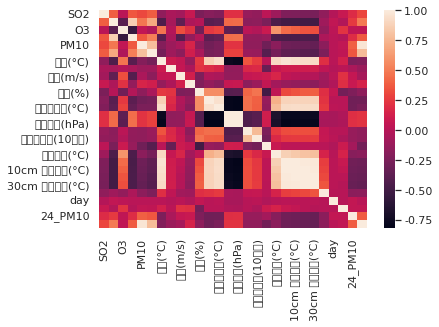

In [592]:
sns.heatmap(df_22.corr())

### (2) train, test 데이터 분리 및 저장

* 22년도 데이터(df_22)를 train 데이터로 저장하세요. y 값을 제외하고 train_x로 저장한 후 y 값은 train_y로 저장하세요.
* 23년도 데이터(df_23)를 test 데이터로 저장하세요. y 값을 제외하고 test_x로 저장한 후 y 값은 test_y로 저장하세요.
* 각각의 데이터프레임을 csv 파일로 저장하세요. (train_x.csv / train_y.csv / test_x.csv / test_y.csv) (단, 인덱스 제외)
* y값은 'PM10_1' 즉, t+1 시점의 미세먼지 농도입니다.

In [588]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

train_x = df_22.drop('PM10_1',axis=1)
train_y = df_22['PM10_1']

test_x = df_23.drop('PM10_1',axis=1)
test_y = df_23['PM10_1']

In [590]:
train_x

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),month,day,hour,24_PM10
time,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-02 00:00:00,0.004,0.8,0.002,0.052,38.0,24.0,-2.8,0.0,2.3,50,55,2.7,-10.6,1016.3,1027.3,7,7,2000,-3.3,-0.4,-0.7,-0.3,0.8,1,2,0,23.0
2022-01-02 01:00:00,0.004,0.8,0.002,0.052,34.0,23.0,-2.9,0.0,2.1,50,57,2.8,-10.2,1015.8,1026.8,8,8,2000,-3.4,-0.4,-0.7,-0.3,0.8,1,2,1,20.0
2022-01-02 02:00:00,0.004,0.8,0.002,0.052,35.0,26.0,-2.6,0.0,1.9,50,57,2.9,-9.9,1015.3,1026.3,8,8,2000,-2.5,-0.4,-0.7,-0.3,0.8,1,2,2,20.0
2022-01-02 03:00:00,0.004,0.6,0.002,0.046,33.0,24.0,-2.1,0.0,2.5,50,56,2.9,-9.7,1015.1,1026.1,9,9,2000,-2.1,-0.4,-0.7,-0.3,0.8,1,2,3,19.0
2022-01-02 04:00:00,0.003,0.5,0.005,0.039,33.0,25.0,-1.9,0.0,2.0,50,55,2.9,-9.7,1014.3,1025.3,8,8,2000,-2.1,-0.3,-0.7,-0.3,0.8,1,2,4,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 18:00:00,0.004,1.2,0.002,0.062,64.0,56.0,0.6,0.0,2.2,20,68,4.3,-4.6,1018.5,1029.4,0,0,1286,-0.4,-0.1,-0.5,-0.5,0.6,12,31,18,30.0
2022-12-31 19:00:00,0.004,1.5,0.002,0.070,71.0,59.0,-0.2,0.0,1.8,20,73,4.4,-4.4,1018.5,1029.4,0,0,1211,-0.9,-0.1,-0.5,-0.5,0.6,12,31,19,36.0
2022-12-31 20:00:00,0.005,1.6,0.002,0.070,76.0,62.0,-0.8,0.0,1.4,20,75,4.3,-4.6,1018.1,1029.0,4,2,1171,-1.8,-0.1,-0.5,-0.5,0.6,12,31,20,40.0


In [589]:
# 각각의 데이터프레임을 csv 파일로 저장 (train_x.csv / train_y.csv / test_x.csv / test_y.csv)
train_x.to_csv('train_x.csv')
train_y.to_csv('train_y.csv')
test_x.to_csv('test_x.csv')
test_y.to_csv('test_y.csv')

# 고생하셨습니다👍👍 

In [ ]:
plt.scatterplot('time')